In [5]:
import pandas as pd
df = pd.read_csv(r'C:\Users\hp\Desktop\AIML bootcamp\train.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [13]:
# age contains 20% data missing
# cabin contains 77% data missing
# embarked contains 0.2% data missing

# Exploratory Data Analysis(EDA)

In [ ]:
import matplotlib.pyplot as plt
plt.pie(labels=df.Survived.value_counts().index, x= df.Survived.value_counts().values, autopct='%.2f%%')
plt.show()

The pie chart shows :
* 61% data on 0 class and
* 38% data on 1 class
which means data is imbalanced.

If data is imbalanced we use Oversampling or Undersampling technique to balance the data.

For imbalance data we cannot use accuracy as evaluation metric.

# Does Pclass affect Survived?

In [19]:
import seaborn as sns

<Axes: xlabel='Pclass', ylabel='count'>

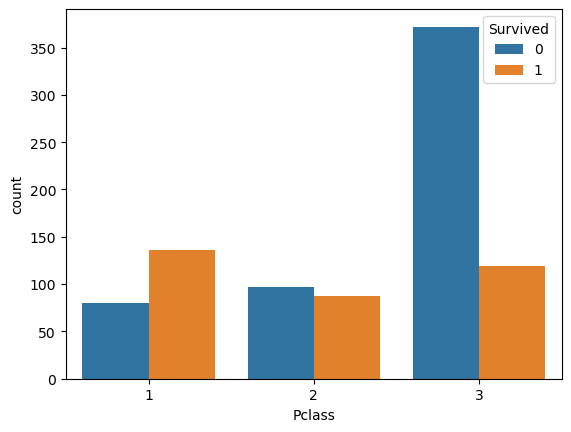

In [20]:
sns.countplot(x='Pclass', hue= 'Survived', data=df)

In [21]:
# Most people survived in Pclass 1
# Most people died in Pclass 3
# Pclass affects Survived

<Axes: xlabel='Sex', ylabel='count'>

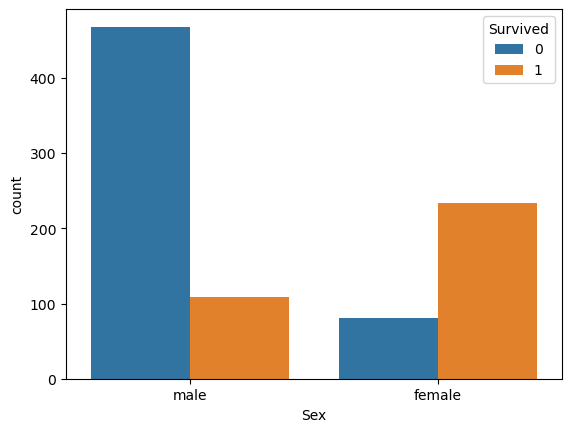

In [22]:
sns.countplot(x='Sex', hue= 'Survived', data=df)

In [23]:
# most of the men died
# most female survived
# it means sex affects survived

<Axes: xlabel='Pclass', ylabel='Age'>

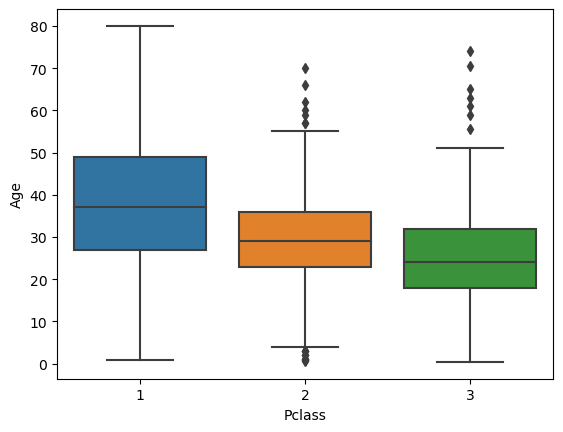

In [25]:
sns.boxplot(x='Pclass', y = 'Age', data = df)

In [26]:
df.groupby(['Pclass']).Age.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [28]:
def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isna(age) and pclass ==1:
        return 37
    elif pd.isna(age) and pclass == 2:
        return 29
    elif pd.isna(age) and pclass == 3:
        return 24
    else:
        return age
    

In [32]:
df.Age = df[['Age','Pclass']].apply(fill_age, axis = 'columns')

In [33]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
# drop cabin column
del df['Cabin']

In [35]:
df.dropna(inplace = True)# can delete multiple columns at once

In [36]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

PassengerId, Name ,  Ticket, makes no contribution to survived column.It is an irrelevet feature.We drop such column.                 

In [37]:
df.drop(columns = ['PassengerId','Name','Ticket'], inplace = True)

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
X = df.iloc[:, 1:]
y= df.Survived

In [43]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.25,S


In [70]:
X_encoded = pd.get_dummies(columns = ['Sex','Embarked'], data = X, drop_first = True)

In [71]:
X_encoded.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test =  train_test_split(X_encoded,y,test_size=0.2,random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluation 

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [75]:
confusion_matrix(y_test,y_pred)

array([[89, 20],
       [15, 54]], dtype=int64)

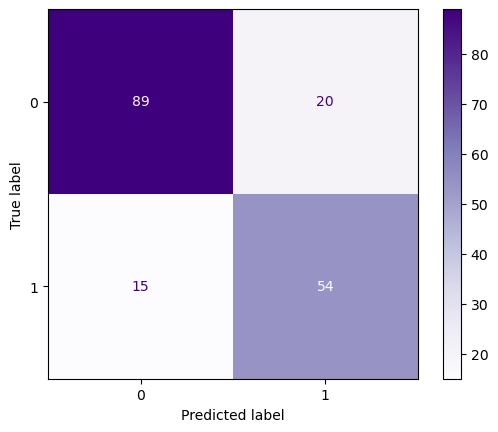

In [76]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='Purples')

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



In [82]:
precision_score(y_test,y_pred)

0.7297297297297297

In [83]:
recall_score(y_test,y_pred)

0.782608695652174

In [84]:
f1_score(y_test,y_pred)

0.7552447552447553